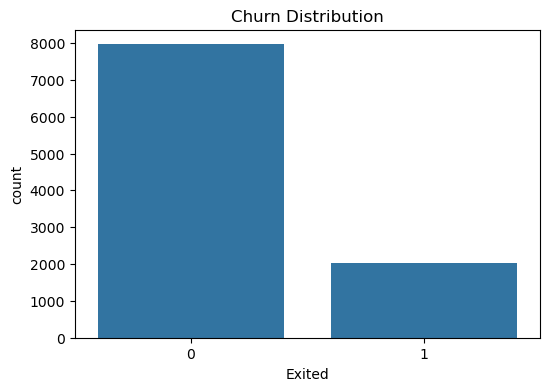

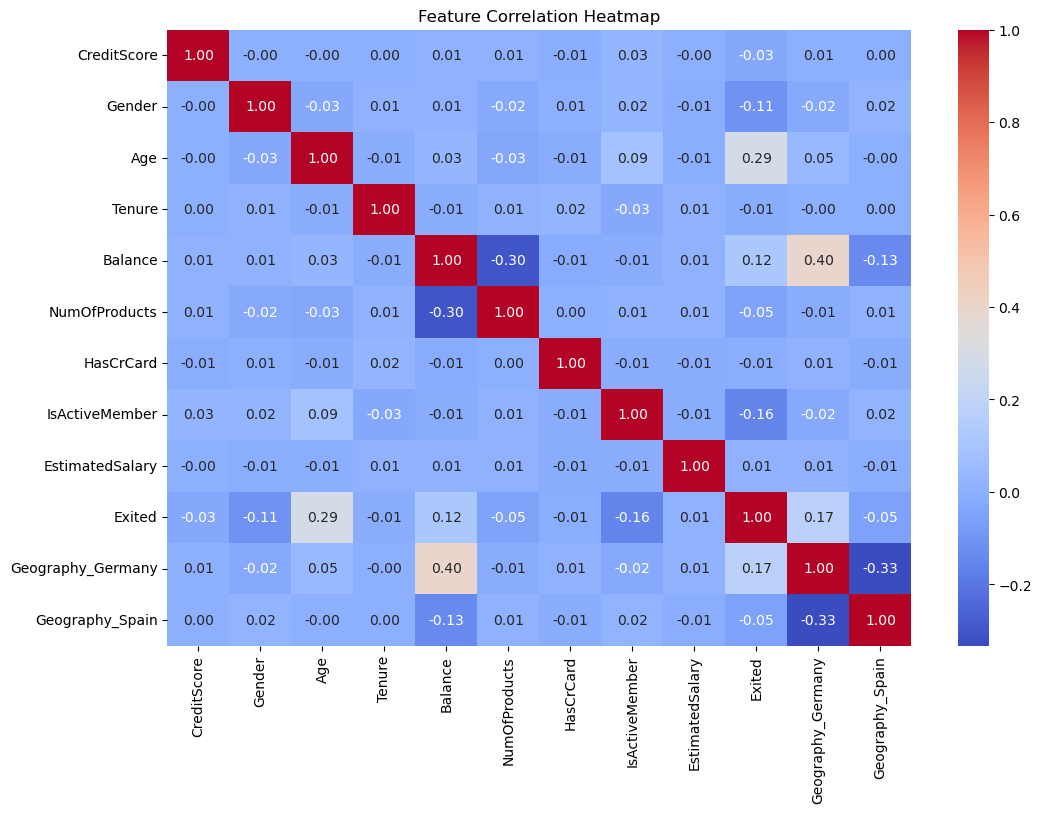


🔍 Logistic Regression
Accuracy: 0.811
Recall: 0.201
ROC AUC: 0.7789
Confusion Matrix:
 [[1543   64]
 [ 314   79]]

🔍 Random Forest
Accuracy: 0.8695
Recall: 0.4809
ROC AUC: 0.8574
Confusion Matrix:
 [[1550   57]
 [ 204  189]]

🔍 XGBoost
Accuracy: 0.8695
Recall: 0.5547
ROC AUC: 0.8502
Confusion Matrix:
 [[1521   86]
 [ 175  218]]


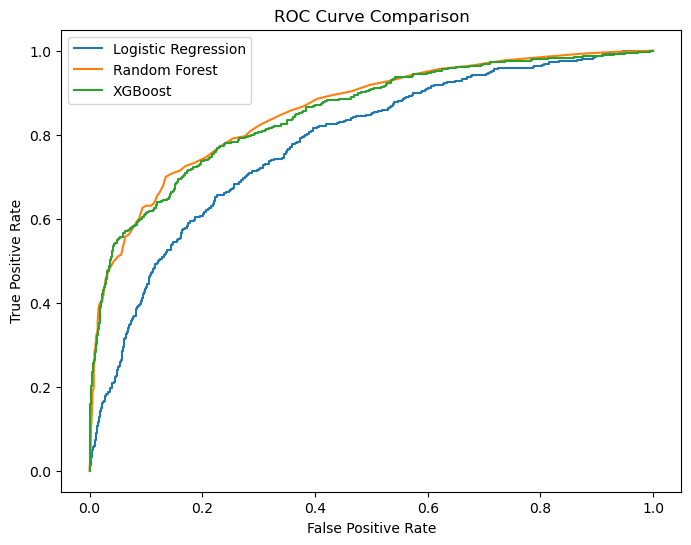

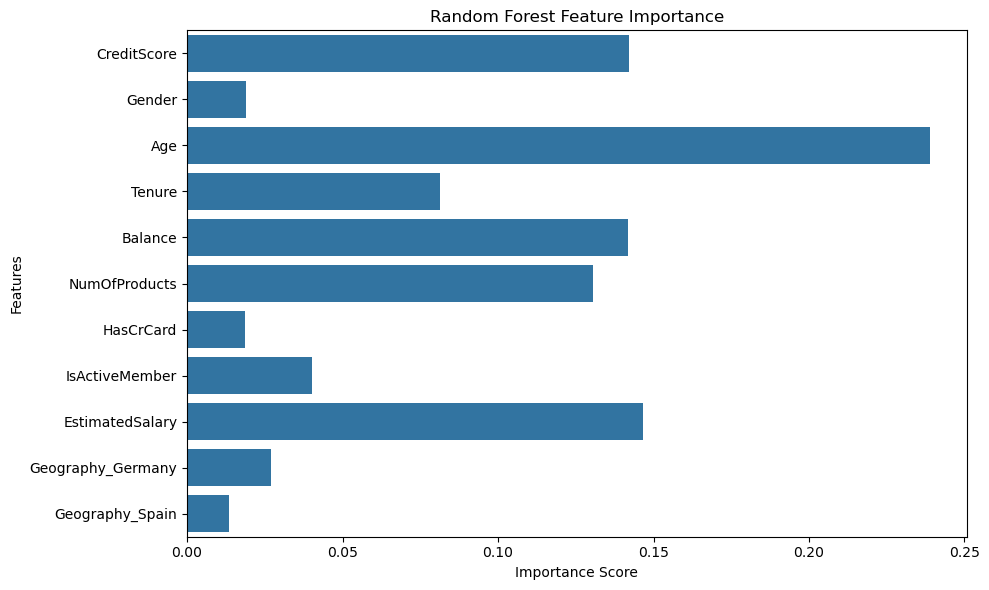

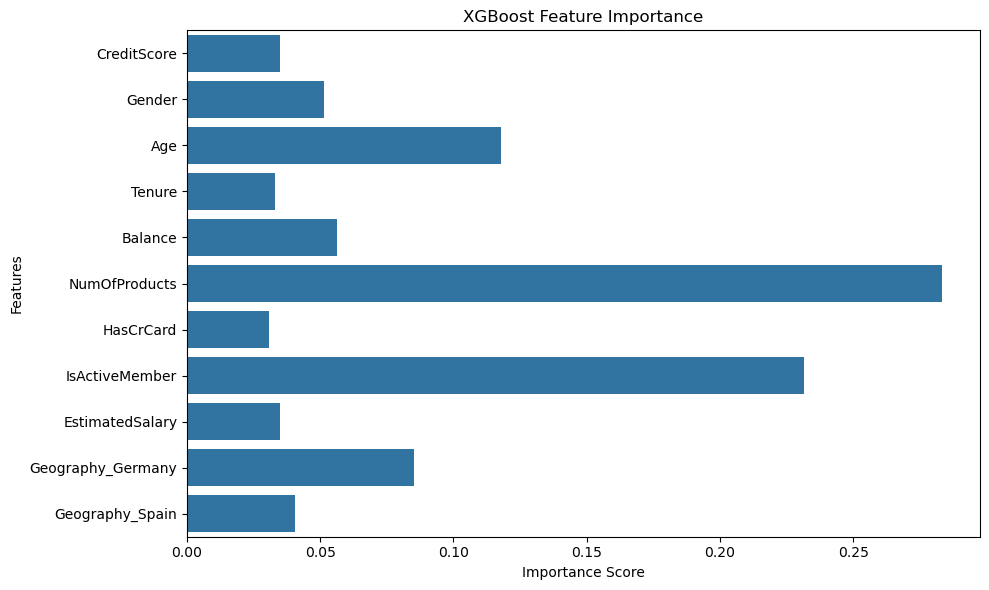

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix


df = pd.read_csv(r"C:\Users\M.GRESHMA LATHA\Downloads\churn.csv")


df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


X = df.drop('Exited', axis=1)
y = df['Exited']  # 1 = Churned, 0 = Stayed

#  Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Model Evaluation
models = [log_model, rf_model, xgb_model]
names = ['Logistic Regression', 'Random Forest', 'XGBoost']

plt.figure(figsize=(8,6))

for model, name in zip(models, names):
    if name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n🔍 {name}")
    print("Accuracy:", round(acc, 4))
    print("Recall:", round(rec, 4))
    print("ROC AUC:", round(auc, 4))
    print("Confusion Matrix:\n", cm)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

# ROC Curve Comparison
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature Importance for Random Forest
importances_rf = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf, y=features)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#Feature Importance for XGBoost
importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb, y=features)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()